In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f1(z):
    return z ** 2
def f2(z):
    return (z-1) ** 2
def f3(z):
    return z ** 2 -1
def f4(z):
    return z ** 2 +1
def df1(z):
    return 2 * z
def df2(z):
    return 2 * (z-1)
def df3(z):
    return 2 * z
def df4(z):
    return 2 * z
def newton_set1(f, df, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(f, df, z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(f, df, z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

In [3]:
def classic_root(a,b,c):
    d= math.sqrt((b**2)-(4*a*c))
    x1= (d*(-1)-b)/(2*a)
    x2= (d-b)/(2*a)
    return [x1,x2]

def poh_shen_loh(b,c):
    u = math.sqrt(abs((b**2)/4-c))
    return[b/2+u,b/2-u]

In [4]:
print("x^2 roots classic",classic_root(1,0,0))
print("x^2 roots poh_shen_loh",poh_shen_loh(0,0))
print("(x-1)^2 roots classic",classic_root(1,-2,1))
print("(x-1)^2  roots poh_shen_loh",poh_shen_loh(-2,1))
print("x^2 -1 roots classic",classic_root(1,0,-1))
print("x^2 -1 roots poh_shen_loh",poh_shen_loh(0,-1))
#print("x^2 +1 roots classic",classic_root(1,0,1))
print("x^2 +1 roots poh_shen_loh",poh_shen_loh(0,1))
## para la última función no existe raiz en los reales, razón por la cual, no se puede calcular la raiz por el método clásico
## las raices calculadas por el método de poh shen loh para la última función no son raices reales de la misma

x^2 roots classic [-0.0, 0.0]
x^2 roots poh_shen_loh [0.0, 0.0]
(x-1)^2 roots classic [1.0, 1.0]
(x-1)^2  roots poh_shen_loh [-1.0, -1.0]
x^2 -1 roots classic [-1.0, 1.0]
x^2 -1 roots poh_shen_loh [1.0, -1.0]
x^2 +1 roots poh_shen_loh [1.0, -1.0]


Text(0, 0.5, 'f(x)')

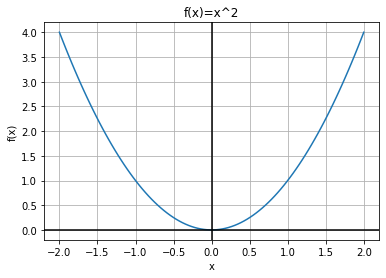

In [5]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f1(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0, 0.5, 'f(x)')

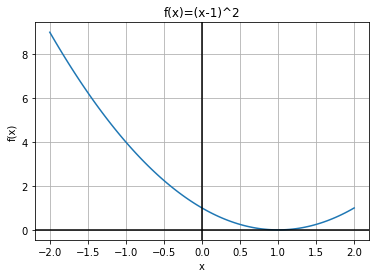

In [6]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

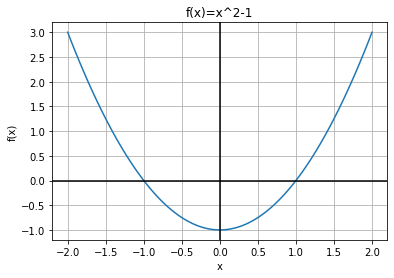

In [7]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f3(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

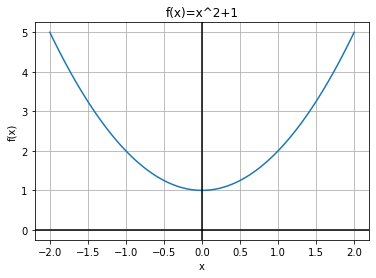

In [8]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f4(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2+1')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


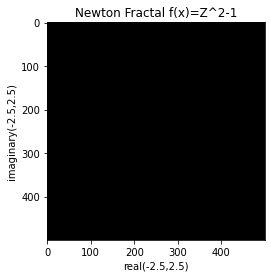

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


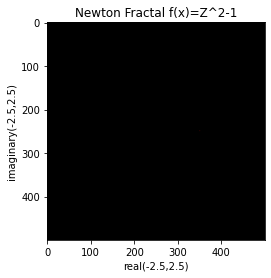

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


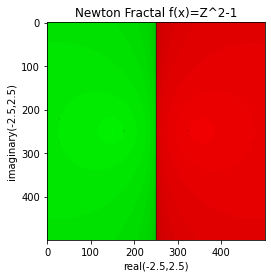

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


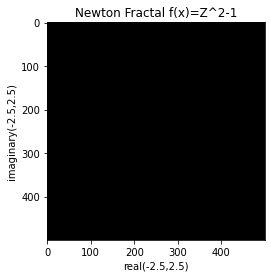

In [9]:
print("zoom out")
display1(f1,df1,zoom=5)
display1(f2,df2,zoom=5)
display1(f3,df3,zoom=5)
display1(f4,df4,zoom=5)

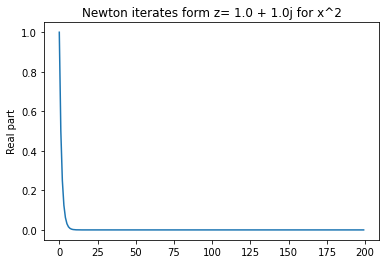

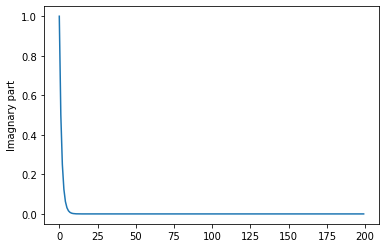

In [10]:
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df1(z)
  znext = z - f1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z= 1.0 + 1.0j for x^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

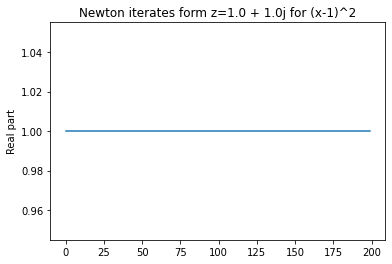

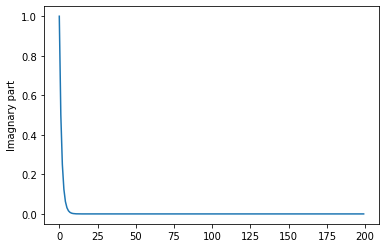

In [11]:
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df2(z)
  znext = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=1.0 + 1.0j for (x-1)^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

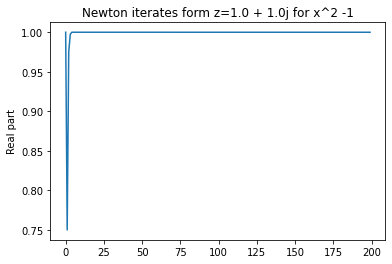

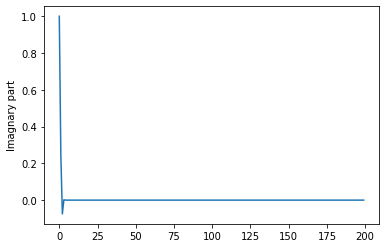

In [12]:
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df3(z)
  znext = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=1.0 + 1.0j for x^2 -1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

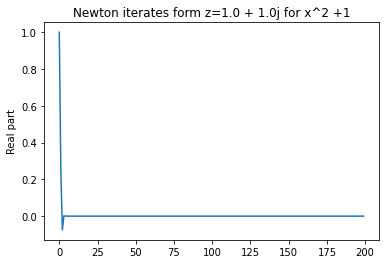

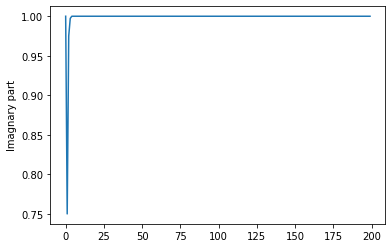

In [13]:
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df4(z)
  znext = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=1.0 + 1.0j for x^2 +1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

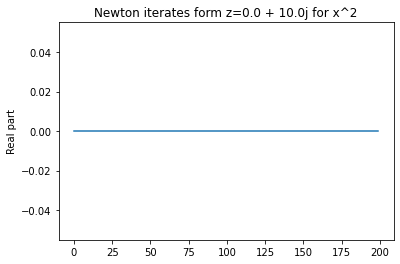

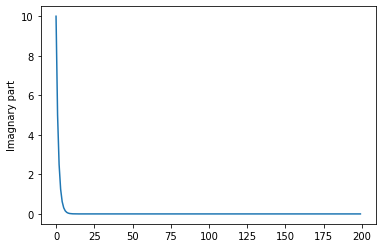

In [14]:
z=-0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df1(z)
  znext = z - f1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=0.0 + 10.0j for x^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

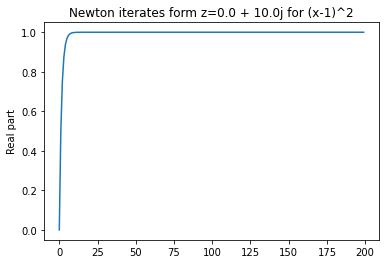

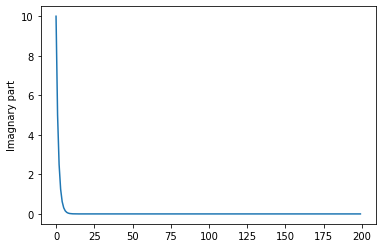

In [15]:
z=-0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df2(z)
  znext = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=0.0 + 10.0j for (x-1)^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

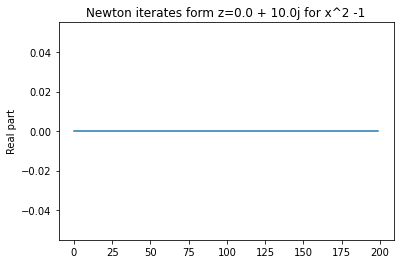

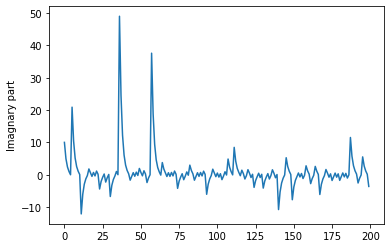

In [16]:
z=-0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df3(z)
  znext = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=0.0 + 10.0j for x^2 -1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

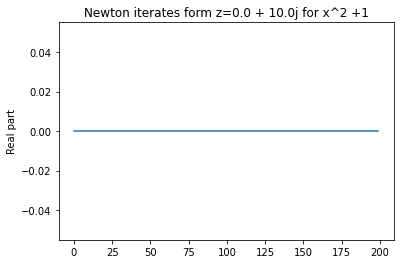

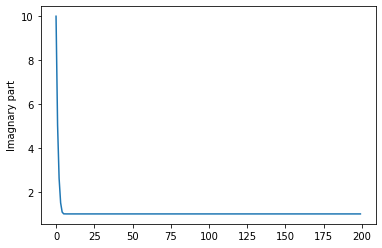

In [17]:
z=-0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df4(z)
  znext = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=0.0 + 10.0j for x^2 +1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

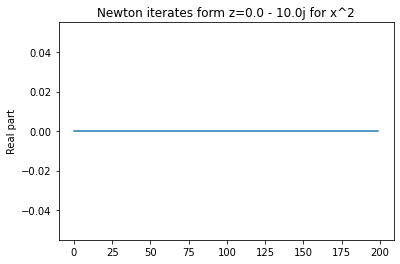

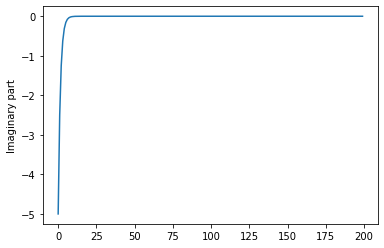

In [18]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df1(z)
  z = z - f1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j for x^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

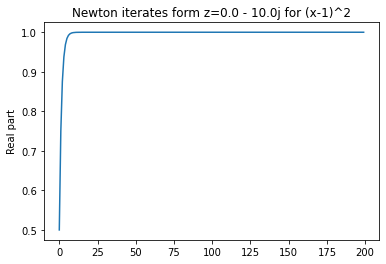

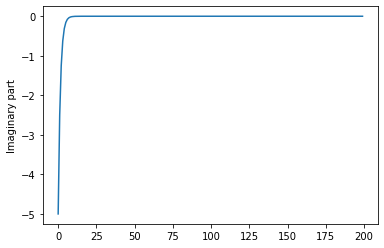

In [19]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df2(z)
  z = z - f2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j for (x-1)^2')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

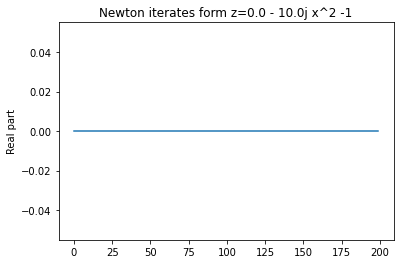

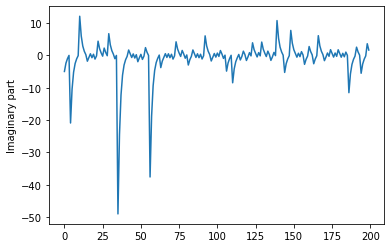

In [20]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df3(z)
  z = z - f3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j x^2 -1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

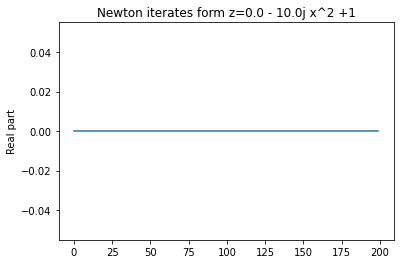

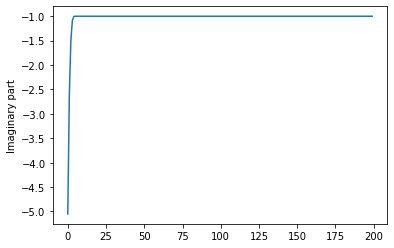

In [21]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df4(z)
  z = z - f4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j x^2 +1')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()